<a href="https://colab.research.google.com/github/sukhmir/medical-Tests-recommendation-system/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-: Capstone project :-
##Title:-
 Medical Tests recommendation system using patient symptoms
##Chatbot name:-
"GB-MediBot"




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#preprocessing

1.   load data




In [2]:
import pandas as pd
data=pd.read_csv(r"/content/drive/MyDrive/capstone_data/symptoms based medical test recommendations.csv")

In [3]:
data

,Questions,medical tests,predicted disease
0,"I have a fever, cough, body aches, headache, a...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
1,"My symptoms include a sore throat, runny nose,...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
2,"I'm experiencing chest congestion, shortness o...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
3,"I have a high fever, nausea, and vomiting. Whi...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
4,"My symptoms involve a persistent cough, fatigu...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
...,...,...,...
1493,Is it common for salt cravings and nausea to b...,"Cortisol Levels,Adrenocorticotropic Hormone (A...",Addison's Disease
1494,I have salt and water imbalance and fatigue. W...,"Cortisol Levels,Adrenocorticotropic Hormone (A...",Addison's Disease
1495,Could weight loss and joint pain be linked to ...,"Cortisol Levels,Adrenocorticotropic Hormone (A...",Addison's Disease
1496,I'm struggling with loss of appetite and darke...,"Cortisol Levels,Adrenocorticotropic Hormone (A...",Addison's Disease


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Questions          1498 non-null   object
 1   medical tests      1498 non-null   object
 2   predicted disease  1498 non-null   object
dtypes: object(3)
memory usage: 35.2+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform your target labels
data['encoded_labels'] = label_encoder.fit_transform(data['predicted disease'])


In [6]:
data.head(100)


,Questions,medical tests,predicted disease,encoded_labels
0,"I have a fever, cough, body aches, headache, a...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
1,"My symptoms include a sore throat, runny nose,...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
2,"I'm experiencing chest congestion, shortness o...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
3,"I have a high fever, nausea, and vomiting. Whi...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
4,"My symptoms involve a persistent cough, fatigu...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu),20
...,...,...,...,...
95,"I've been hoarse, lost weight, and feel fatigu...","Tuberculin Skin Test (TST) or Mantoux Test,Int...",Tuberculosis (TB),29
96,"I'm experiencing night sweats, chills, and che...","Tuberculin Skin Test (TST) or Mantoux Test,Int...",Tuberculosis (TB),29
97,"I've had chest pain, weight loss, and a persis...","Tuberculin Skin Test (TST) or Mantoux Test,Int...",Tuberculosis (TB),29
98,"I'm coughing up blood, have night sweats, and ...","Tuberculin Skin Test (TST) or Mantoux Test,Int...",Tuberculosis (TB),29


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Questions          1498 non-null   object
 1   medical tests      1498 non-null   object
 2   predicted disease  1498 non-null   object
 3   encoded_labels     1498 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.9+ KB


In [8]:
data['encoded_labels'].value_counts()

20    50
29    50
18    50
19    50
12    50
21    50
26    50
8     50
22    50
2     50
4     50
27    50
25    50
23    50
5     50
3     50
1     50
28    50
17    50
10    50
11    50
13    50
7     50
16    50
6     50
24    50
14    50
0     50
9     49
15    49
Name: encoded_labels, dtype: int64

In [14]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the first few rows of the encoded data and the class mapping
print("Encoded Data:")
print(data[['predicted disease', 'encoded_labels']].head())

print("\nClass Mapping:")
classla=[]
for class_label, encoded_value in class_mapping.items():
    print(f"{class_label}: {encoded_value}")
    classla.append(class_label)

print(classla)

Encoded Data:
  predicted disease  encoded_labels
0   Influenza (Flu)              20
1   Influenza (Flu)              20
2   Influenza (Flu)              20
3   Influenza (Flu)              20
4   Influenza (Flu)              20

Class Mapping:
Addison's Disease: 0
Arrhythmias (Irregular Heartbeat): 1
Asthma: 2
Atherosclerosis: 3
Brain Cancer: 4
Breast Cancer: 5
COVID-19.: 6
Cholera: 7
Chronic Obstructive : 8
Colorectal Cancer: 9
Coronary Artery Disease (CAD): 10
Dengue Fever: 11
Diabetes: 12
Ebola Virus Disease: 13
HIV/AIDS: 14
Heart Attack (Myocardial Infarction): 15
Hepatitis: 16
Hypertension (High Blood Pressure): 17
Hyperthyroidism (Overactive Thyroid): 18
Hypothyroidism (Underactive Thyroid): 19
Influenza (Flu): 20
Interstitial Lung Disease: 21
Leukemia: 22
Lung Cancer: 23
Malaria: 24
Prostate Cancer: 25
Pulmonary Disease (COPD): 26
Skin Cancer (Melanoma): 27
Stroke: 28
Tuberculosis (TB): 29
["Addison's Disease", 'Arrhythmias (Irregular Heartbeat)', 'Asthma', 'Atherosclerosis', 

In [15]:
data['predicted disease'].unique()

array(['Influenza (Flu)', 'Tuberculosis (TB)', 'HIV/AIDS', 'Malaria',
       'COVID-19.', 'Hepatitis', 'Cholera', 'Ebola Virus Disease',
       'Dengue Fever', 'Coronary Artery Disease (CAD)',
       'Hypertension (High Blood Pressure)',
       'Heart Attack (Myocardial Infarction)', 'Stroke',
       'Arrhythmias (Irregular Heartbeat)', 'Atherosclerosis',
       'Breast Cancer', 'Lung Cancer', 'Prostate Cancer',
       'Colorectal Cancer', 'Skin Cancer (Melanoma)', 'Brain Cancer',
       'Asthma', 'Leukemia', 'Chronic Obstructive ',
       'Pulmonary Disease (COPD)', 'Interstitial Lung Disease',
       'Diabetes', 'Hypothyroidism (Underactive Thyroid)',
       'Hyperthyroidism (Overactive Thyroid)', "Addison's Disease"],
      dtype=object)

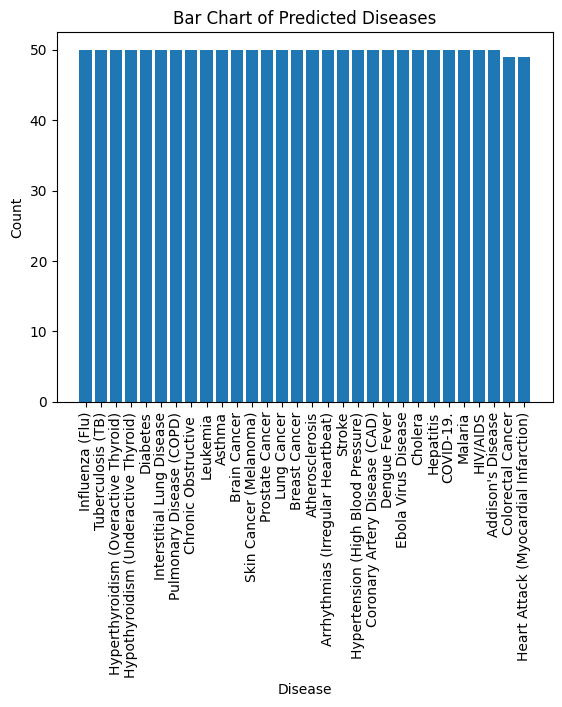

In [16]:
import matplotlib.pyplot as plt

# Count the unique values in the "predicted disease" column
unique_counts = data['predicted disease'].value_counts()

# Create a bar chart
plt.bar(unique_counts.index, unique_counts)

# Add labels
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Bar Chart of Predicted Diseases')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)

# Show the chart
plt.show()



#Installing and importing some important libraries



In [17]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 41.2 MB/s eta 0:00:00


In [18]:

import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

#Now use BertTokenizer


In [20]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')


In [21]:
#test the tokenizer for one sentence
token = tokenizer.encode_plus(
    data['Questions'].iloc[0],
    max_length=256,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)

In [22]:
token.input_ids

<tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,   146,  1138,   170, 10880,   117, 21810,   117,  1404,
        12953,  1116,   117, 16320,   117,  1105, 18418,   119,  1327,
         5715,  1202,  1128, 18029,   136,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [23]:
X_input_ids = np.zeros((len(data), 256))
X_attn_masks = np.zeros((len(data), 256))

In [24]:
def generate_training_data(data, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(data['Questions'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [25]:
X_input_ids, X_attn_masks = generate_training_data(data, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [26]:
labels = np.zeros((len(data), 30))
labels.shape

(1498, 30)

In [27]:
labels[np.arange(len(data)), data['encoded_labels'].values] = 1

In [28]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading..

In [29]:
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1) # one sample data

<_TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>

In [30]:
def diseaseDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [31]:
dataset = dataset.map(diseaseDatasetMapFunction) # converting to required format for tensorflow dataset

In [32]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(30,), dtype=tf.float64, name=None))>

#Split the data to test and train

In [33]:
dataset = dataset.shuffle(10000).batch(16, drop_remainder=True) # batch size, drop any left out tensor


In [34]:

dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 30), dtype=tf.float64, name=None))>

In [35]:
p=0.8
train_size = int((len(data)//16)*p) # for each 16 batch of data we will have len(df)//16 samples, take 80% of that for train.


In [36]:
train_size

74

In [37]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)


#Now lets use BERT model

In [38]:
from transformers import TFBertModel


In [39]:
model = TFBertModel.from_pretrained('bert-base-cased') # bert base model with pretrained weights

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [40]:

# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

In [41]:
bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(30, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

disease_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
disease_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 256, 7                                       

#Model Training



In [42]:
import tensorflow as tf

# Define the initial learning rate and other hyperparameters
initial_learning_rate = 1e-5
decay_steps = 10000  # Adjust this value as needed
decay_rate = 0.9  # Adjust this value as needed

# Define a learning rate schedule with exponential decay
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=False
)

# Create an optimizer with the learning rate schedule
optim = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

# Define other components like loss and accuracy
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')


In [43]:
disease_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [44]:
hist = disease_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15
)

Epoch 1/15
74/74 [==============================] - 111s 891ms/step - loss: 3.3114 - accuracy: 0.0718 - val_loss: 2.9432 - val_accuracy: 0.2039
Epoch 2/15
74/74 [==============================] - 71s 958ms/step - loss: 2.6466 - accuracy: 0.3615 - val_loss: 2.0875 - val_accuracy: 0.5559
Epoch 3/15
74/74 [==============================] - 71s 960ms/step - loss: 1.8005 - accuracy: 0.6588 - val_loss: 1.2403 - val_accuracy: 0.7763
Epoch 4/15
74/74 [==============================] - 66s 893ms/step - loss: 1.2038 - accuracy: 0.7812 - val_loss: 0.8626 - val_accuracy: 0.8421
Epoch 5/15
74/74 [==============================] - 66s 895ms/step - loss: 0.7760 - accuracy: 0.8725 - val_loss: 0.5699 - val_accuracy: 0.8980
Epoch 6/15
74/74 [==============================] - 66s 895ms/step - loss: 0.5436 - accuracy: 0.9079 - val_loss: 0.3460 - val_accuracy: 0.9474
Epoch 7/15
74/74 [==============================] - 71s 960ms/step - loss: 0.3972 - accuracy: 0.9375 - val_loss: 0.2179 - val_accuracy: 0.977

###plot graphs

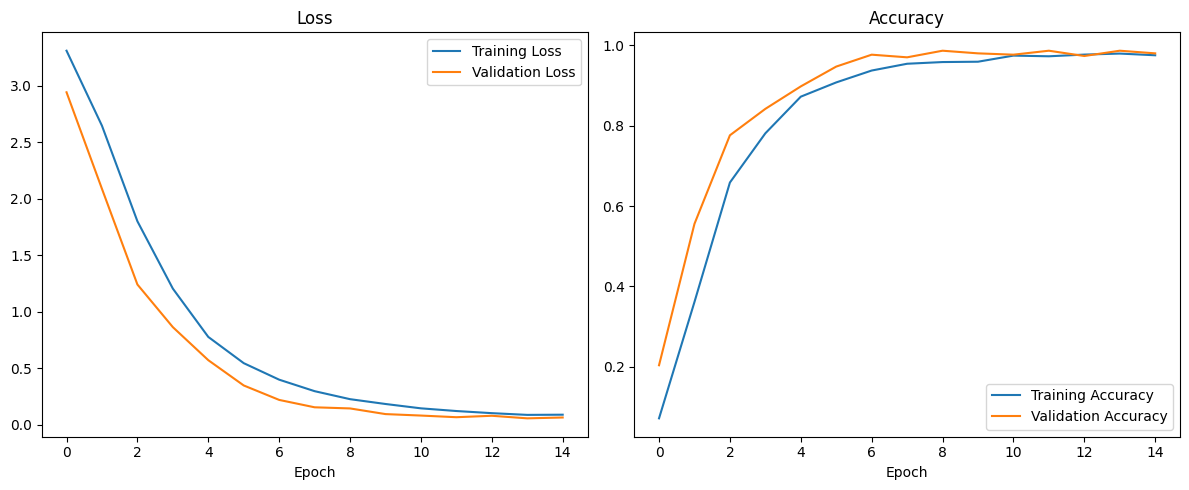

In [45]:
import matplotlib.pyplot as plt

# Extract training and validation loss and accuracy from the history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


#Saving & Loading the model

In [46]:
disease_model.save('medical_tests_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Load saved model and predict

In [ ]:
import tensorflow as tf
disease_model = tf.keras.models.load_model(r'/content/saved_model.pb')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=["Addison's Disease", 'Arrhythmias (Irregular Heartbeat)',
                                                    'Asthma', 'Atherosclerosis', 'Brain Cancer', 'Breast Cancer',
                                                    'COVID-19.', 'Cholera', 'Chronic Obstructive ', 'Colorectal Cancer',
                                                    'Coronary Artery Disease (CAD)', 'Dengue Fever', 'Diabetes', 'Ebola Virus Disease',
                                                    'HIV/AIDS', 'Heart Attack (Myocardial Infarction)', 'Hepatitis',
                                                    'Hypertension (High Blood Pressure)', 'Hyperthyroidism (Overactive Thyroid)',
                                                    'Hypothyroidism (Underactive Thyroid)', 'Influenza (Flu)', 'Interstitial Lung Disease',
                                                    'Leukemia', 'Lung Cancer', 'Malaria', 'Prostate Cancer', 'Pulmonary Disease (COPD)',
                                                    'Skin Cancer (Melanoma)', 'Stroke', 'Tuberculosis (TB)']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]


OSError: ignored

In [ ]:
input_text = input('welcome, and please enter your symptoms: ')
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(disease_model, processed_data=processed_data)
print(f"You may have: {result}")


welcome, and please enter your symptoms: headache
1/1 [==============================] - 0s 67ms/step
You may have: Cholera


In [ ]:
# Create a dictionary
my_dict = {
    'Influenza (Flu)':'Complete Blood Count (CBC),C-Reactive Protein (CRP),Procalcitonin,Influenza Antibody Testing',
    'Tuberculosis (TB)':'Tuberculin Skin Test (TST) or Mantoux Test,Interferon-Gamma Release Assays (IGRAs),Complete Blood Count (CBC),Erythrocyte Sedimentation Rate (ESR),C-Reactive Protein (CRP) Test,Liver Function Tests (LFTs),HIV Test',
    'HIV/AIDS':'HIV Antibody Test (ELISA/Western Blot),CD4 Count,Viral Load Test,CD4/CD8 Ratio,Resistance Testing,Complete Blood Count (CBC),Liver Function Tests,Kidney Function Tests,Hepatitis Tests,STD Tests,Cytomegalovirus (CMV) Test',
    'Malaria':'Malaria Smear (Blood Film),Rapid Diagnostic Tests (RDTs),Polymerase Chain Reaction (PCR),Quantitative Buffy Coat (QBC) Test,Serology Tests,Complete Blood Count (CBC)',
    'COVID-19':'Antibody (Serology) Tests,Antigen Tests,CRP (C-Reactive Protein) Test,D-Dimer Test,Complete Blood Count (CBC),Ferritin Test,Differential White Blood Cell Count',
    'Hepatitis':'Hepatitis Panel,Hepatitis A Antibody Tests,Hepatitis B Surface Antigen (HBsAg) Test,Hepatitis B Core Antibody (anti-HBc) Test,Hepatitis B Surface Antibody (anti-HBs) Test,Hepatitis B DNA Test,Hepatitis C Antibody Test,Hepatitis C RNA Test,Hepatitis C Antibody Test,Hepatitis C RNA Test,Liver Function Tests,Bilirubin Test,Albumin and Prothrombin Time (PT) Tests,Liver Biopsy or Imaging',
    'Cholera':'Stool Culture,PCR (Polymerase Chain Reaction),Rapid Antigen Test',
    'Ebola Virus Disease':'Polymerase Chain Reaction (PCR) Test,Reverse Transcription PCR (RT-PCR),Enzyme-Linked Immunosorbent Assay (ELISA),Rapid Diagnostic Tests (RDTs),Serology Tests,Viral Culture,Real-time PCR (RT-PCR),Next-Generation Sequencing (NGS),Lateral Flow Assays',
    'Dengue Fever':'Complete Blood Count (CBC),NS1 Antigen Test,IgM Antibody Test,IgG Antibody Test,PCR (Polymerase Chain Reaction) Test,Platelet Count,Liver Function Tests,Serology Tests',
    'Coronary Artery Disease (CAD)':'Cholesterol Panel,High-Sensitivity C-Reactive Protein (hs-CRP),Troponin,Brain Natriuretic Peptide (BNP) or N-Terminal Pro B-Type Natriuretic Peptide (NT-proBNP),Homocysteine,Fasting Blood Sugar (Glucose),Complete Blood Count (CBC),Lipoprotein(a)',
    'Hypertension (High Blood Pressure)':'Blood Glucose Test,Lipid Profile,Kidney Function Tests,Potassium and Sodium Levels,Thyroid Function Tests,C-reactive Protein (CRP),Hemoglobin A1c (HbA1c),Renal Function Panel,Urine Tests,Electrocardiogram (ECG or EKG)',
    'Heart Attack (Myocardial Infarction)':'ECG,Cardiac Troponin,Creatine Kinase-MB (CK-MB),Myoglobin,C-Reactive Protein (CRP),Complete Blood Count (CBC),Lipid Profile,Natriuretic Peptides',
    'Stroke':'Complete Blood Count (CBC),Blood Glucose Test,Lipid Profile,Coagulation Studies,Cardiac Biomarkers,Inflammatory Markers,Toxicology Screen,Hemoglobin A1c (HbA1c)',
    'Arrhythmias (Irregular Heartbeat)':'Electrocardiogram (ECG or EKG),Holter Monitor,Event Monitor,Stress Test,Echocardiogram,Electrophysiological (EP) Study,Cardiac MRI,Blood Tests,Tilt Table Test,Implantable Loop Recorder (ILR),Signal-Averaged ECG,CT Scan or Coronary Angiography,Genetic Testing',
    'Atherosclerosis':'Lipid Profile,High-Density Lipoprotein (HDL) Cholesterol,C-Reactive Protein (CRP),Homocysteine,Fasting Blood Glucose,Lipoprotein(a) (Lp(a)),Apolipoprotein B (ApoB)',
    'Breast Cancer':'Breast Self-Examination (BSE),Clinical Breast Examination (CBE),Mammography,Breast Ultrasound,Breast Magnetic Resonance Imaging (MRI),Biopsy,Ductal Lavage or Ductal Endoscopy,Genetic Testing,Breast Cancer Biomarker Tests,Sentinel Lymph Node Biopsy,Positron Emission Tomography (PET) Scan',
    'Lung Cancer':'Chest X-ray,CT Scan,Sputum Cytology,Bronchoscopy,Needle Biopsy,Mediastinoscopy,PET Scan,MRI,Bone Scan,Blood Tests,Pulmonary Function Tests,Genetic Testing',
    'Prostate Cancer':'Prostate-Specific Antigen (PSA) Test,Digital Rectal Exam (DRE),Transrectal Ultrasound (TRUS),Prostate Biopsy,Multiparametric Magnetic Resonance Imaging (mpMRI),Urine Tests,Bone Scan,CT Scan,MRI,CT Urography,Pelvic Lymph Node Dissection,Genomic Tests',
    'Colorectal Cancer':'Colonoscopy,Flexible Sigmoidoscopy,Fecal Occult Blood Test (FOBT),Fecal Immunochemical Test (FIT),Stool DNA Test,Virtual Colonoscopy (CT Colonography),Double-Contrast Barium Enema,Biopsy,carcinoembryonic antigen (CEA),Genetic Testing',
    'Skin Cancer (Melanoma)':'Skin Examination,Dermatoscopy,Biopsy,Confocal Microscopy,Sentinel Lymph Node Biopsy,Blood Tests,Imaging Tests',
    'Brain Cancer':' Tomography) Scan,SPECT (Single Photon Emission Computed Tomography) Sca,Functional MRI (fMRI),EEG (Electroencephalogram),Tumor Marker Tests',
    'Asthma':'Spirometry,Peak Expiratory Flow (PEF) Test,Chest X-Ray,Allergy Testing,Fractional Exhaled Nitric Oxide (FeNO) Test,Methacholine Challenge Test,CT Scan of the Lungs,Blood Tests,Sputum Eosinophil Test,Bronchial Provocation Test',
    'Leukemia':'Complete Blood Count (CBC),Peripheral Blood Smear,Bone Marrow Aspiration and Biopsy,Cytogenetic Analysis,Flow Cytometry,Molecular Testing,Immunohistochemistry,Lumbar Puncture (Spinal Tap),Imaging Tests,Biopsy of Lymph Nodes or Other Tissues,Blood Chemistry Tests,Genomic Testing',
    'Chronic Obstructive ':'Spirometry,Chest X-ray,CT (computed tomography) scan,Arterial Blood Gas (ABG) Test,Pulmonary Function Tests (PFTs),Alpha-1 Antitrypsin Deficiency Test,COPD Assessment Test (CAT),6-Minute Walk Test,Electrocardiogram (ECG or EKG),Sputum Examination',
    'Pulmonary Disease (COPD)':'Spirometry,Chest X-ray,CT (computed tomography) scan,Arterial Blood Gas (ABG) Test,Pulmonary Function Tests (PFTs),Alpha-1 Antitrypsin Deficiency Test,COPD Assessment Test (CAT),6-Minute Walk Test,Electrocardiogram (ECG or EKG),Blood Tests,Sputum Examination',
    'Interstitial Lung Disease':'High-Resolution Computed Tomography (HRCT) Scan,Pulmonary Function Tests (PFTs),Bronchoscopy,Blood Tests,Arterial Blood Gas (ABG) Test,Lung Biopsy,Exercise Testing,Echocardiogram,Autoimmune Panel,Genetic Testing,Ventilation/Perfusion (V/Q) Scan,Methacholine Challenge Test,Histopathological Analysis',
    'Diabetes':'Fasting Blood Glucose Test (FBG),Hemoglobin A1c (HbA1c) Test,Oral Glucose Tolerance Test (OGTT),Random Blood Sugar Test,Postprandial Blood Glucose Test,C-Peptide Test,Autoantibody Tests,Blood Lipid Profile,Kidney Function Tests,Liver Function Tests,Thyroid Function Tests,Electrolyte Levels',
    'Hypothyroidism (Underactive Thyroid)':'Thyroid-Stimulating Hormone (TSH) Test,Free T4 (Free Thyroxine) Test,Free T3 (Free Triiodothyronine) Test,Total T4 and Total T3 Tests,Thyroid Antibody Tests,Reverse T3 (rT3) Test,Thyroid Hormone Binding Ratios,Thyroglobulin Test,Calcitonin Test,Calcitonin Test,Prolactin Test,Lipid Profile',
    'Hyperthyroidism (Overactive Thyroid)':'Thyroid-Stimulating Hormone (TSH) Test,Free T4 (Free Thyroxine) Test,Free T3 (Free Triiodothyronine) Test,Total T4 and Total T3 Tests,Thyroid Antibody Tests,Reverse T3 (rT3) Test,Thyroid Hormone Binding Ratios,Thyroglobulin Test,Calcitonin Test,Calcitonin Test,Prolactin Test,Lipid Profile',
    "Addison's Disease":'Cortisol Levels,Adrenocorticotropic Hormone (ACTH) Stimulation Test,Renin and Aldosterone Levels,Renin and Aldosterone Levels,Electrolyte Levels,Complete Blood Count (CBC),Blood Glucose Levels,Thyroid Function Tests,Autoantibody Testing,Lipid Profile,Plasma Cortisol Binding Globulin (CBG) Levels'
}

# Predicted key (e.g., from a model or user input)
predicted_key = result

# Check if the predicted key exists in the dictionary
if predicted_key in my_dict:
    # Access the value associated with the predicted key and print it
    predicted_value = my_dict[predicted_key]
    print(f"On the bases of symptoms,I recommend you some medical tests: {predicted_value}")
else:
    print(f"'{predicted_key}'unknown")

# You can also use the get() method to access the value with a default if the key doesn't exist
predicted_value = my_dict.get(predicted_key, "Key not found")
print(predicted_value)


On the bases of symptoms,I recommend you some medical tests: Fasting Blood Glucose Test (FBG),Hemoglobin A1c (HbA1c) Test,Oral Glucose Tolerance Test (OGTT),Random Blood Sugar Test,Postprandial Blood Glucose Test,C-Peptide Test,Autoantibody Tests,Blood Lipid Profile,Kidney Function Tests,Liver Function Tests,Thyroid Function Tests,Electrolyte Levels
Fasting Blood Glucose Test (FBG),Hemoglobin A1c (HbA1c) Test,Oral Glucose Tolerance Test (OGTT),Random Blood Sugar Test,Postprandial Blood Glucose Test,C-Peptide Test,Autoantibody Tests,Blood Lipid Profile,Kidney Function Tests,Liver Function Tests,Thyroid Function Tests,Electrolyte Levels
